In [1]:
# Importing the required libraries:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import fbprophet

## **Load and Summarize Dataset**

In [2]:
realdata=pd.read_csv('/content/Preparedfooddata.csv')
realdata.head()

,Unnamed: 0,Member_number,Date,itemDescription
0,0,1808,2015-07,Fruits & Vegetables
1,1,2552,2015-01,Milk Products
2,2,2300,2015-09,Fruits & Vegetables
3,3,1187,2015-12,Fruits & Vegetables
4,4,3037,2015-02,Milk Products


In [3]:
realdata=realdata.drop(['Unnamed: 0'],axis=1)
realdata

,Member_number,Date,itemDescription
0,1808,2015-07,Fruits & Vegetables
1,2552,2015-01,Milk Products
2,2300,2015-09,Fruits & Vegetables
3,1187,2015-12,Fruits & Vegetables
4,3037,2015-02,Milk Products
...,...,...,...
38760,4471,2014-10,Milk Products
38761,2022,2014-02,Sweet food products
38762,1097,2014-04,Snack food Products
38763,1510,2014-12,Fruits & Vegetables


In [4]:
realdata

,Member_number,Date,itemDescription
0,1808,2015-07,Fruits & Vegetables
1,2552,2015-01,Milk Products
2,2300,2015-09,Fruits & Vegetables
3,1187,2015-12,Fruits & Vegetables
4,3037,2015-02,Milk Products
...,...,...,...
38760,4471,2014-10,Milk Products
38761,2022,2014-02,Sweet food products
38762,1097,2014-04,Snack food Products
38763,1510,2014-12,Fruits & Vegetables


In [ ]:
data=realdata['Date'].value_counts().sort_index(ascending=True)
data

2014-01    1527
2014-02    1437
2014-03    1411
2014-04    1561
2014-05    1615
2014-06    1570
2014-07    1576
2014-08    1575
2014-09    1472
2014-10    1591
2014-11    1469
2014-12    1473
2015-01    1797
2015-02    1560
2015-03    1722
2015-04    1699
2015-05    1793
2015-06    1694
2015-07    1724
2015-08    1921
2015-09    1587
2015-10    1670
2015-11    1785
2015-12    1536
Name: Date, dtype: int64

### Preparing dataframe for furthur forecasting.

In [5]:
data= {'Month' : ['2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
               '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12'],
    'Product Sales' : [1527,1437,1411,1561,1615,1570,1576,1575,1472,1591,1469,1473,
                       1797,1560,1722,1699,1793,1694,1724,1921,1587,1670,1785,1536] 
}
df = pd.DataFrame(data)
df.head()

,Month,Product Sales
0,2014-01,1527
1,2014-02,1437
2,2014-03,1411
3,2014-04,1561
4,2014-05,1615


### Let's explore our data:

In [6]:
df.tail()

,Month,Product Sales
19,2015-08,1921
20,2015-09,1587
21,2015-10,1670
22,2015-11,1785
23,2015-12,1536


In [7]:
df.columns

Index(['Month', 'Product Sales'], dtype='object')

In [8]:
df.dtypes

Month            object
Product Sales     int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          24 non-null     object
 1   Product Sales  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [10]:
df.describe()

,Product Sales
count,24.000000
mean,1615.208333
std,129.992635
min,1411.000000
25%,1533.750000
50%,1581.500000
75%,1704.750000
max,1921.000000


## **Plot Dataset**

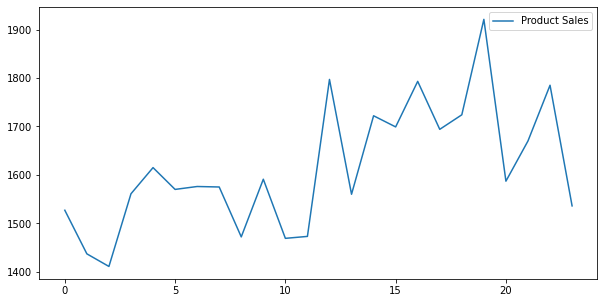

In [11]:
df.plot(figsize=(10,5))
plt.savefig('saved_figure1.jpg', transparent=True)       #Saving the figure for frontend.

 ## **Forecast Food products Sales With Prophet**

### Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

### Prophet is open source software released by Facebook’s Core Data Science team. 





### Fit Prophet Model

In [12]:
# prepare expected column names
from pandas import to_datetime
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [13]:
from fbprophet import Prophet
# define the model
model = Prophet(interval_width=0.95,daily_seasonality=True,weekly_seasonality=True,yearly_seasonality=True)
# fit the model
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


### Forecasting:

In [14]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '2016-%02d' % i
	future.append([date])
future =pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [15]:
# use the model to make a forecast
forecast = model.predict(future)

### Let's view forecast:

In [17]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,-717.040207,1728.782241,1813.309087,-756.520621,-671.993774,2485.302861,2485.302861,2485.302861,2227.891594,2227.891594,2227.891594,-984.594352,-984.594352,-984.594352,1242.005619,1242.005619,1242.005619,0.0,0.0,0.0,1768.262654
1,2016-02-01,-686.526224,1269.971031,1505.974199,-808.522090,-572.518921,2078.493121,2078.493121,2078.493121,2227.891594,2227.891594,2227.891594,835.043781,835.043781,835.043781,-984.442254,-984.442254,-984.442254,0.0,0.0,0.0,1391.966896
2,2016-03-01,-657.980886,2422.217952,2846.913178,-881.325370,-456.630143,3303.543322,3303.543322,3303.543322,2227.891594,2227.891594,2227.891594,129.164428,129.164428,129.164428,946.487300,946.487300,946.487300,0.0,0.0,0.0,2645.562436
3,2016-04-01,-627.466903,-98.247435,561.817252,-968.802257,-308.737570,870.554822,870.554822,870.554822,2227.891594,2227.891594,2227.891594,-984.594352,-984.594352,-984.594352,-372.742420,-372.742420,-372.742420,0.0,0.0,0.0,243.087919
4,2016-05-01,-597.937242,1164.370918,2031.815228,-1056.512883,-189.068573,2220.883802,2220.883802,2220.883802,2227.891594,2227.891594,2227.891594,554.476143,554.476143,554.476143,-561.483935,-561.483935,-561.483935,0.0,0.0,0.0,1622.946560


In [18]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
7,2016-08-01,-507.379616,4977.386283,6590.867631,-1367.383558,246.097791,6344.769840,6344.769840,6344.769840,2227.891594,2227.891594,2227.891594,835.043781,835.043781,835.043781,3281.834466,3281.834466,3281.834466,0.0,0.0,0.0,5837.390225
8,2016-09-01,-476.865633,-1206.135517,708.015643,-1492.382837,421.768324,286.247320,286.247320,286.247320,2227.891594,2227.891594,2227.891594,-413.860348,-413.860348,-413.860348,-1527.783925,-1527.783925,-1527.783925,0.0,0.0,0.0,-190.618313
9,2016-10-01,-447.335972,873.751050,3098.458972,-1640.730025,583.977897,2514.481075,2514.481075,2514.481075,2227.891594,2227.891594,2227.891594,-2.884627,-2.884627,-2.884627,289.474108,289.474108,289.474108,0.0,0.0,0.0,2067.145103
10,2016-11-01,-416.821989,1772.222196,4367.038305,-1781.541109,813.275001,3553.763304,3553.763304,3553.763304,2227.891594,2227.891594,2227.891594,129.164428,129.164428,129.164428,1196.707283,1196.707283,1196.707283,0.0,0.0,0.0,3136.941315
11,2016-12-01,-387.292328,-1895.182162,1083.552738,-1914.086202,1064.648698,18.904040,18.904040,18.904040,2227.891594,2227.891594,2227.891594,-413.860348,-413.860348,-413.860348,-1795.127206,-1795.127206,-1795.127206,0.0,0.0,0.0,-368.388289


In [19]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds         yhat   yhat_lower   yhat_upper
0 2016-01-01  1768.262654  1728.782241  1813.309087
1 2016-02-01  1391.966896  1269.971031  1505.974199
2 2016-03-01  2645.562436  2422.217952  2846.913178
3 2016-04-01   243.087919   -98.247435   561.817252
4 2016-05-01  1622.946560  1164.370918  2031.815228


In [21]:
forecast[['ds','yhat']].head(6)       #Forecast for first 6 months.

,ds,yhat
0,2016-01-01,1768.262654
1,2016-02-01,1391.966896
2,2016-03-01,2645.562436
3,2016-04-01,243.087919
4,2016-05-01,1622.946560
5,2016-06-01,2027.040632


In [22]:
forecast[['ds','yhat']].tail(6)         #Forecast for last 6 months.

,ds,yhat
6,2016-07-01,696.151065
7,2016-08-01,5837.390225
8,2016-09-01,-190.618313
9,2016-10-01,2067.145103
10,2016-11-01,3136.941315
11,2016-12-01,-368.388289


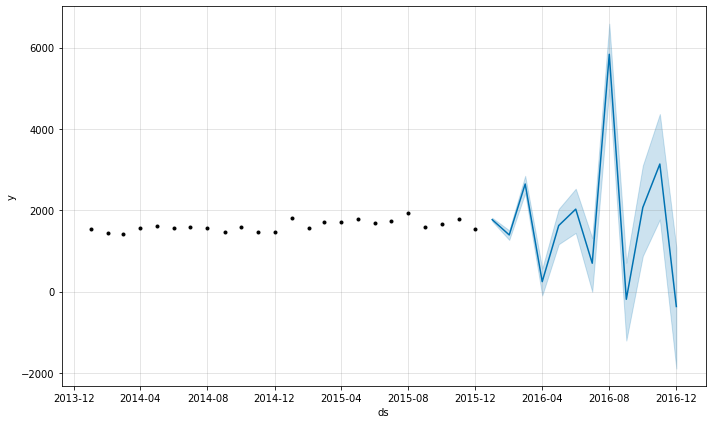

<Figure size 432x288 with 0 Axes>

In [23]:
# plot forecast
from matplotlib import pyplot
model.plot(forecast)
pyplot.show()
plt.savefig('save_fig2.jpg')                  # Saving the figure for frontend.

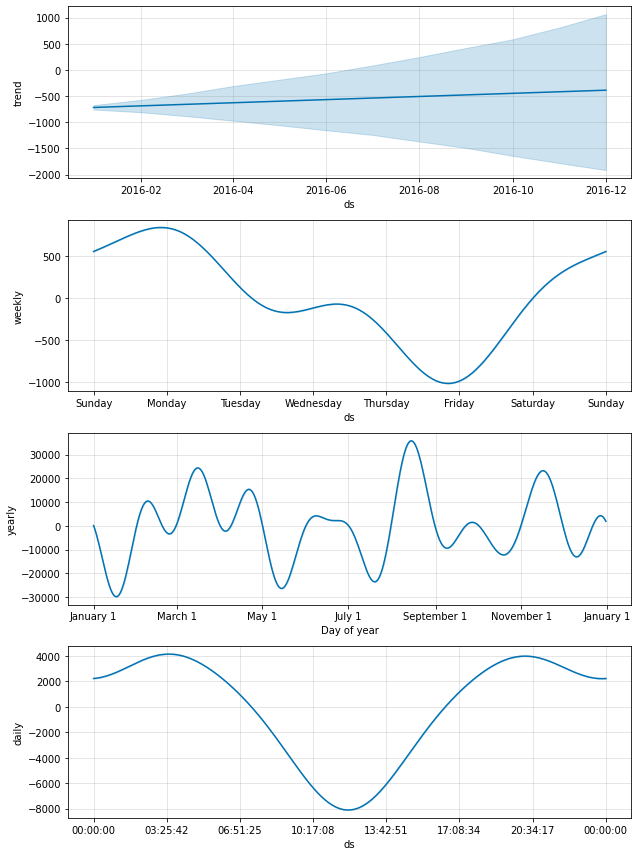

In [24]:
plot=model.plot_components(forecast)
plt.savefig('saved_figure3.jpg', transparent=True)                  #Saving figure for frontend.

### The above visualizations show daily,weekly and yearly trends of Sales for food products.